In [54]:
import tensorflow as tf
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import keras

In [55]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [56]:
len(X_train)

60000

In [57]:
len(X_test)

10000

In [58]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

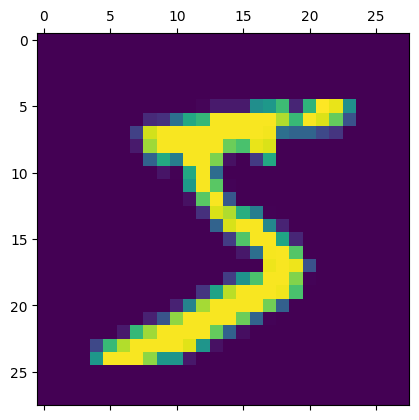

In [59]:
plt.matshow(X_train[0])

In [60]:
y_train[0]

5

In [61]:
X_train.shape

(60000, 28, 28)

In [62]:
X_train = X_train / 255
X_test = X_test / 255


In [63]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [64]:
X_test_flattened

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [65]:
len(X_test_flattened[0])

784

In [66]:
X_test_flattened.shape

(10000, 784)

In [68]:
model = keras.Sequential(
    [
        keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
    ]
)

In [69]:
model.compile(
    optimizer = 'adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [70]:
model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8118 - loss: 0.7274
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9116 - loss: 0.3133
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9207 - loss: 0.2797
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9237 - loss: 0.2728
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9262 - loss: 0.2638


In [71]:
model.evaluate(X_test_flattened, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9140 - loss: 0.3044


[0.2668286859989166, 0.9261999726295471]

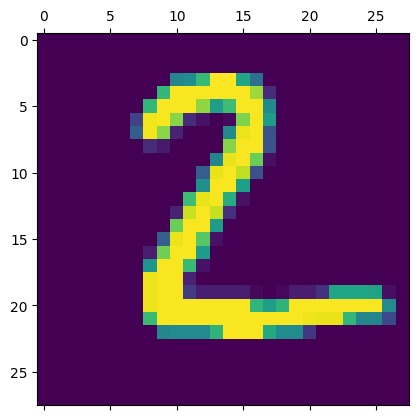

In [87]:
plt.matshow(X_test[1])

In [88]:
y_predicted = model.predict(X_test_flattened)
y_predicted[1]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([1.4810165e-03, 5.4823035e-01, 9.9981451e-01, 1.9757049e-01,
       2.2923416e-09, 9.2249885e-02, 1.2769738e-03, 1.9800950e-09,
       2.0975868e-01, 1.4064218e-05], dtype=float32)

In [89]:
np.argmax(y_predicted[1])

2

In [90]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [91]:
cm = tf.math.confusion_matrix(labels=y_test, predictions= y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 967,    0,    0,    1,    2,    1,    1,    1,    4,    3],
       [   0, 1115,    3,    2,    0,    1,    2,    0,   12,    0],
       [   7,    1,  973,   11,    5,    0,    2,    7,   25,    1],
       [   0,    0,    3,  990,    0,    6,    0,    2,    6,    3],
       [   1,    0,    0,    0,  950,    0,    5,    0,    2,   24],
       [   2,    0,    0,    7,    1,  872,    2,    0,    6,    2],
       [   5,    2,    1,    1,    5,    6,  935,    0,    3,    0],
       [   1,    5,    7,    6,    1,    0,    0,  987,    5,   16],
       [   3,    0,    2,    3,    4,    4,    1,    2,  951,    4],
       [   2,    2,    0,    5,    5,    3,    0,    1,    5,  986]])>

Text(95.72222222222221, 0.5, 'Truth')

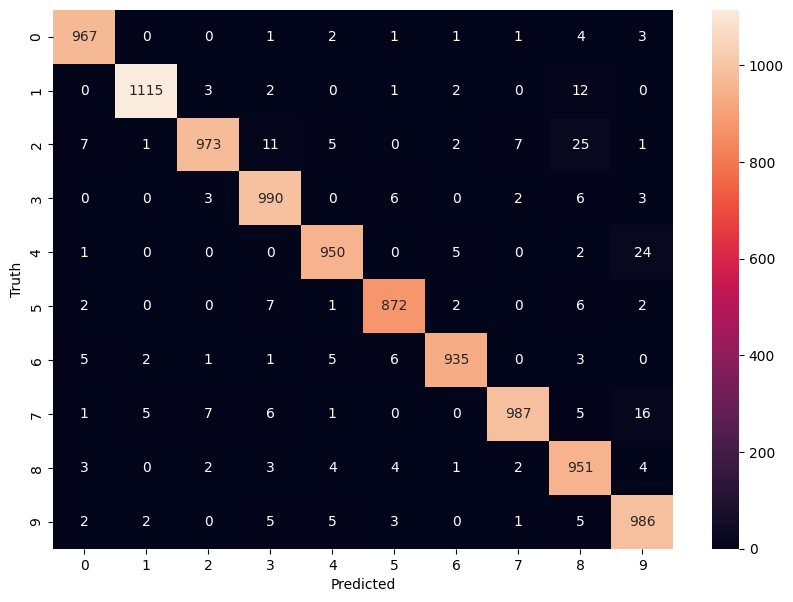

In [92]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [93]:
model = keras.Sequential(
    [
        keras.layers.Dense(100, input_shape=(784,), activation= 'relu'),
        keras.layers.Dense(10, activation='sigmoid')
    ]
)

model.compile(
    optimizer = 'adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8703 - loss: 0.4594
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9597 - loss: 0.1363
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9741 - loss: 0.0882
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9806 - loss: 0.0674
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9852 - loss: 0.0504


In [94]:
y_predicted = model.predict(X_test_flattened)
y_predicted[1]

312/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([5.8505796e-03, 9.3876278e-01, 9.9999321e-01, 5.8147371e-02,
       8.5566533e-08, 1.0448680e-01, 1.4246271e-02, 4.8490597e-07,
       2.2136101e-01, 7.1548393e-06], dtype=float32)

In [95]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [96]:
cm = tf.math.confusion_matrix(labels=y_test, predictions= y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 971,    0,    0,    1,    0,    0,    3,    2,    2,    1],
       [   0, 1125,    2,    3,    0,    1,    1,    0,    3,    0],
       [   5,    4, 1006,    3,    2,    0,    2,    7,    3,    0],
       [   0,    0,    5,  979,    1,   10,    0,    7,    5,    3],
       [   1,    1,    1,    0,  967,    0,    4,    3,    0,    5],
       [   2,    0,    0,    5,    1,  875,    5,    2,    1,    1],
       [   4,    4,    0,    1,    4,    8,  937,    0,    0,    0],
       [   1,   10,    6,    1,    0,    0,    0, 1004,    2,    4],
       [   5,    4,    0,    8,    4,    7,    5,    3,  934,    4],
       [   2,    5,    0,    4,   13,    6,    0,    9,    1,  969]])>

Text(95.72222222222221, 0.5, 'Truth')

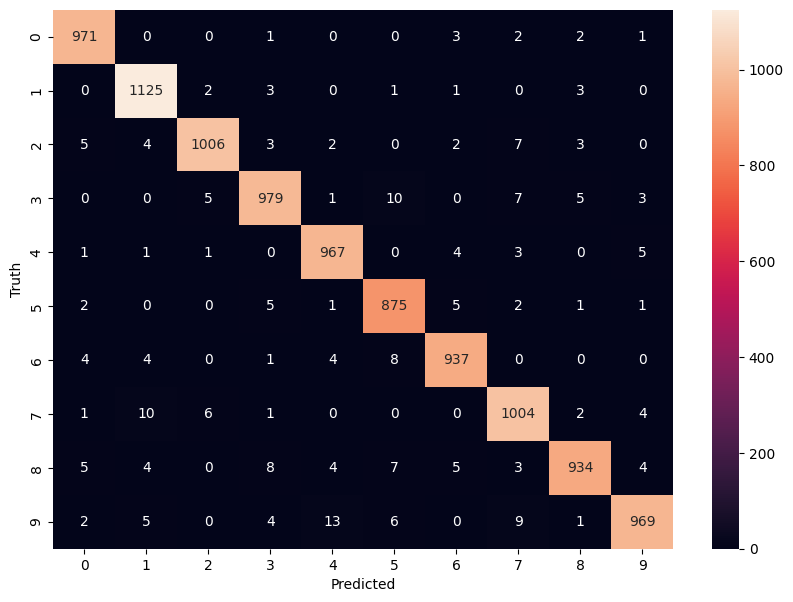

In [97]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')